'모두카페' 스터디카페 매출 분석 및 운영 전략
=============

### ● 의뢰 주체 : '모두카페' 스터디 카페



### ● 문제 상황 : 월 매출액만 알 뿐 매출 추세나 음료/음식 별 판매 금액 등 세부 내용은 전혀 모른다



### ● 목차 


#### 1. 데이터 불러오기


#### 2. 데이터 분석하기 - 필수문제 


    ① 월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.

    ② 여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

    ③ 여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.


#### 3. 내가 정의한 문제 


#### 4. 결론

#### 5. 총 회고 



# 1. 데이터 불러오기

In [252]:
# 필요 라이브러리 호출하기
# Pandas, Numpy, Matplotlib, Seaborn을 호출해봅니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import datetime as dt

# 회고 : 전체 코드를 새로 실행할 때마다 Glyph missing from current font 에러가 생겨 plt.rcParams['axes.unicode_minus'] = False를 추가했다
# 출처 : https://zephyrus1111.tistory.com/243

In [253]:
# 데이터 호출하기
# entry_data.csv, sales_data.csv, item_data.csv, item_entry_data.csv의
# 총 네 가지 파일을 각각 호출합니다.
# 파일들은 본 클라우드에 저장되어있어 다음을 참고하여 호출해주세요.
# entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')

entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_data.csv')
item_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_data.csv')
item_entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_entry_data.csv')

In [254]:
# entry_data 데이터 정보 확인하기
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [255]:
# sales_data 데이터 정보 확인하기
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1), object(7)
memory usage: 444.2+ KB


In [256]:
# item_data 데이터 정보 확인하기
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      174 non-null    int64 
 1   분류      174 non-null    object
 2   상품명     174 non-null    object
 3   판매금액    174 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.6+ KB


In [257]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      34 non-null     int64 
 1   분류      34 non-null     object
 2   상품명     34 non-null     object
 3   판매금액    34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


# 2. 데이터 분석하기 

### 필수문제 ① : 월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.


In [258]:
# 1-3-2 데이터 분석하기
# 필수문제1 : 월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.
# 활용할 데이터(sales_data)를 temp_var로 정의하기

temp_var = sales_data
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [259]:
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당

temp_var['date'] = sales_data['결제일시'].str[:7]
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04


In [260]:
# salse_data의 결제금액에 포함된 쉼표(,) 지우기

sales_data['결제금액'] = sales_data['결제금액'].str.replace(',', '')
sales_data.head()

# 회고 : 처음엔 for문으로 복잡하게 짰다. 

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04


In [261]:
# salse_data의 결제금액을 숫자형태로 바꾸기

sales_data['결제금액'] = sales_data['결제금액'].astype('int')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   int64 
 7   고객      6300 non-null   object
 8   date    7105 non-null   object
dtypes: int64(2), object(7)
memory usage: 499.7+ KB


In [262]:
# temp_var에 payment열을 만들어 date 기준으로 집계하기

temp_var = sales_data
temp_var['payment'] = sales_data['결제금액']
temp_var = temp_var['payment'].groupby(sales_data['date']).sum()
temp_var

# 회고 : payment열이 원래 없는데 있는 것 처럼 쓰여있어서 한참 고민하다가 퍼실님께 힌트를 얻어 아예 payment 열을 만들어버렸다

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: payment, dtype: int64

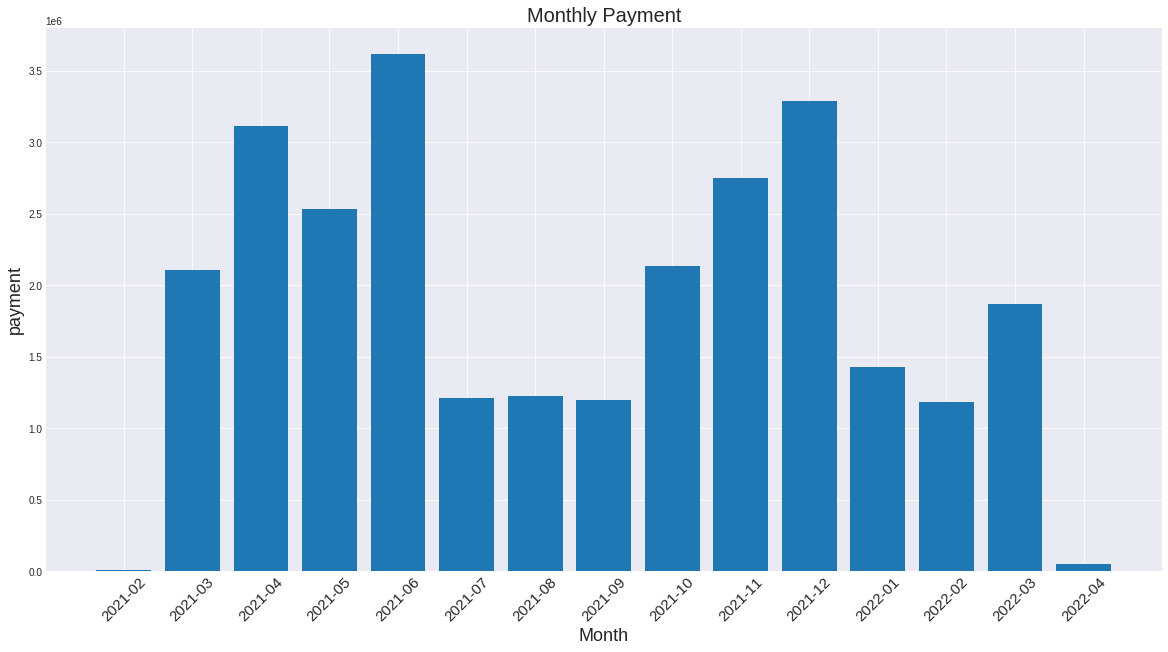

In [263]:
# 집계 결과를 시각화하기

plt.figure(figsize=(20,10))
plt.bar(temp_var.index, temp_var)
plt.title('Monthly Payment', fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('payment', fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.show()



월별 매출액 추세 그래프를 보면 주로 3-6월, 10-12월이 높게 나타나고, 그 중 6월과 12월의 매출이 가장 높음을 알 수 있다.    
21년 2월과 22년 4월이 가장 매출이 낮았으면, 이를 제외하면 학생들이 방학인 7-9월과 1-2월의 매출이 전반적으로 낮다.   







 ### 필수문제 ② : 여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

In [264]:
# 1-3-2 가장 인기있는 음식/음료
# 필수 문제2 : 여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]

temp_sales = sales_data[sales_data['판매수량'] != -1]
temp_sales.head()

# 회고 : 힌트에서는 ==-1이라고 되어있는데, -1인 데이터를 제외하고 집계해야하니까 != -1로 짰다

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,payment
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04,4500
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04,5500
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04,4000
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04,1000
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04,5000


In [265]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
top_sales = temp_sales['상품명'].value_counts()
top_sales.to_frame()
top_sales.head(10)

김치볶음밥         1204
라면             749
짜장라면           455
치즈불고기볶음밥       420
계란추가           314
낙지볶음밥          312
새우볶음밥          309
아메리카노(ICE)     284
치즈감자튀김         246
감자튀김           242
Name: 상품명, dtype: int64

In [266]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
!pip install koreanize-matplotlib

import koreanize_matplotlib

# 출처 : 디스코드 박준혁 님 

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

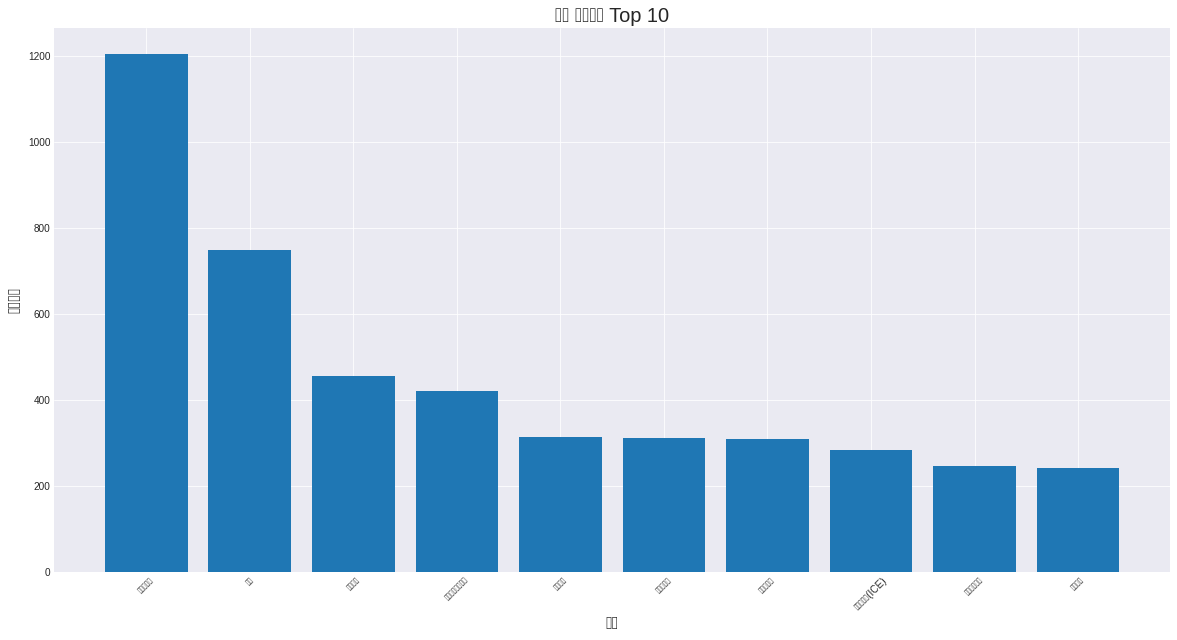

In [267]:
plt.rcParams['axes.unicode_minus'] = False
# 집계 결과를 시각화하기
top_10_sales = top_sales.head(10)

plt.figure(figsize=(20,10))
plt.bar(top_10_sales.index, top_10_sales)
plt.title('음식 판매수량 Top 10', fontsize=20)
plt.xlabel('종류', fontsize=18)
plt.ylabel('판매수량', fontsize=18)
plt.xticks(rotation=45)
plt.show()


# 회고1 : top_sales에서 가장 판매량이 많은 10개만 가져오고 싶어서 top_10_sales라는 새로운 변수를 만들고 그래프 그리는데 23분이 걸렸다.
# 회고2 : 모듈 불러올 때 plt.rcParams['axes.unicode_minus'] = False 넣고 에러 없어진 줄 알았는데..안 없어진다. 그래프 코드마다 넣어줘야하나?

In [268]:
# 여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
# temp_var의 payment열을 상품명을 기준으로 집계하기  

temp_var['판매매출'] = (sales_data['판매수량'] * sales_data['payment'])
item_payment = temp_var['판매매출'].groupby(sales_data['상품명']).sum()
item_payment.head(10)


상품명
(면)계란추가-국물라면            5000
(면)계란후라이 추가-불닭/짜장      20000
(면)치즈추가                10500
(밥)계란후라이 추가             3000
(밥)슈레드치즈추가              4500
(밥)체다치즈추가               2000
2인라면                    1700
2인불닭                    7000
2인짜장라면                 12200
감자튀김                 1083800
dtype: int64

In [269]:
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기

item_payment.to_frame()
top_payment = item_payment.sort_values(ascending=False)
top_payment

상품명
김치볶음밥          6036900
라면             2967000
치즈불고기볶음밥       2309100
짜장라면           2044500
낙지볶음밥          1721700
                ...   
(밥)계란후라이 추가       3000
이어폰(커널형)          3000
비엔나소세지(토핑)        3000
(밥)체다치즈추가         2000
2인라면              1700
Length: 100, dtype: int64

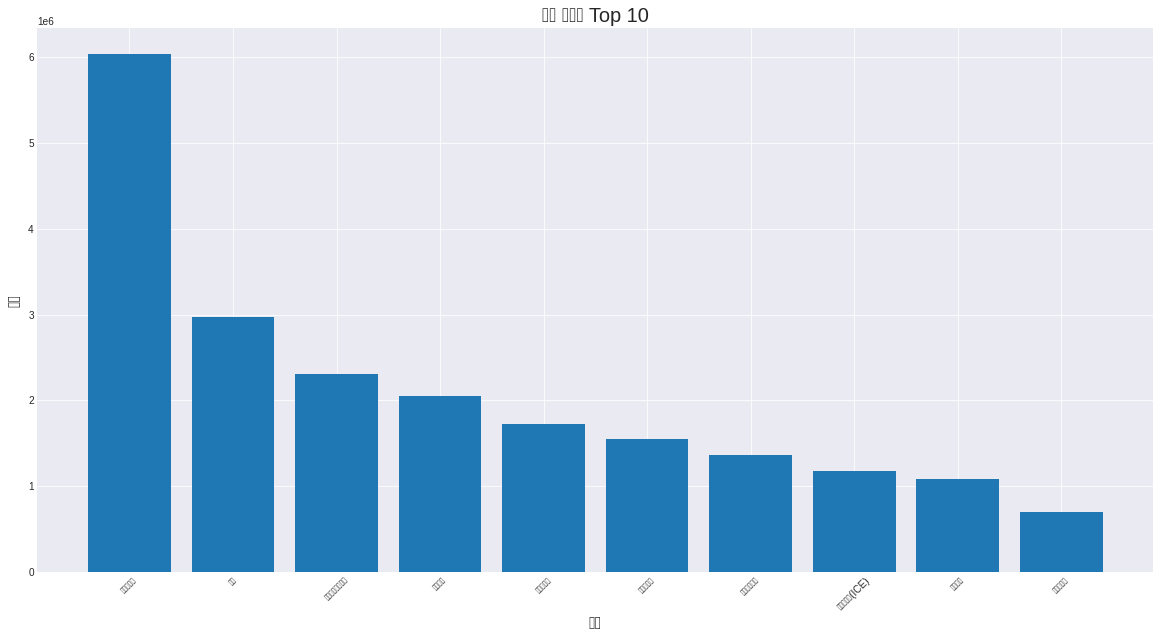

In [271]:
plt.rcParams['axes.unicode_minus'] = False
# 집계 결과 시각화하기

top_payment1 = top_payment.head(10)
plt.figure(figsize=(20,10))
plt.bar(top_payment1.index, top_payment1)
plt.title('음식 매출액 Top 10', fontsize=20)
plt.xlabel('종류', fontsize=18)
plt.ylabel('매출', fontsize=18)
plt.xticks(rotation=45)
plt.show()

# 회고 : 이 그래프가 나오게하기 위해 전날부터 몇 시간을 매달렸는지..덕분에 시리즈를 데이터프레임으로 전환 하는걸 배웠다(사실 위에서 한 번 했는데..)

In [272]:
# 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)
# 여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

temp_var = entry_data

# temp_var에 판매개수라는 새로운 열을 만들어 1 부여
temp_var['판매개수'] = 1

### 필수문제 ③ : 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

In [273]:
# temp_var의 금액을 숫자형태로 변환하기

temp_var['금액'].astype('int')
temp_var['판매개수'].astype('int')
temp_var.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,판매개수
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,1
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,1
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,1
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,1
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928,1


In [274]:
# temp_var의 금액을 요금제명을 기준으로 집계하기

# temp_var에 판매매출이라는 새로운 열을 만듦
temp_var['판매매출'] = (temp_var['판매개수'] * temp_var['금액'])
temp_var.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,판매개수,판매매출
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,1,3000
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,1,3000
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,1,7400
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,1,7400
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928,1,7400


In [275]:
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기


entry_payment = temp_var['판매매출'].groupby(temp_var['요금제명']).sum()

entry_payment.to_frame()
top_tickets = entry_payment.sort_values(ascending=False)

top_entry = top_tickets.head(10)
top_entry

# 회고1 : '1시간'과 '1시간요금제' 같이 비슷한 요금제를 동일한걸로 봐야하는지 헷갈렸는데, 알 수 있는 방법이 없어 원래 데이터 대로 하기로 했다.
# 회고2 : 매번 시리즈를 데이터프레임으로 다시 바꾸는 과정을 넣는 코드가 필요한건지, 쉽게 할 수 있는 방법이 있는데 모르고 있는건지 모르겠다.  

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 판매매출, dtype: int64

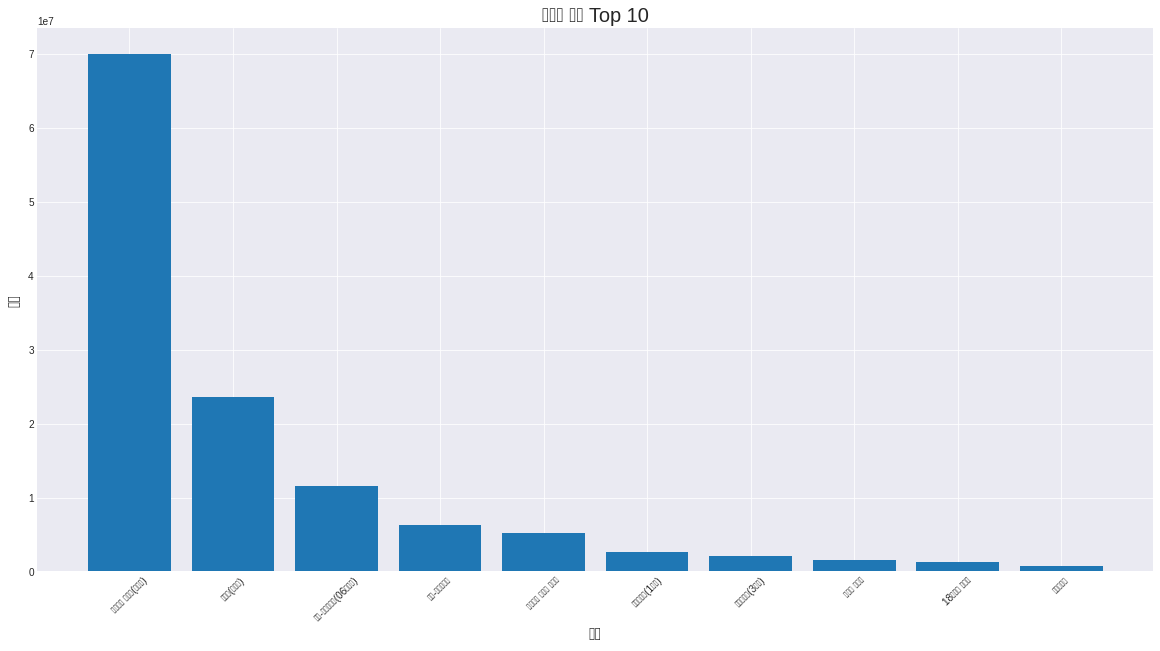

In [280]:
plt.rcParams['axes.unicode_minus'] = False
# 집계 결과 시각화하기

plt.figure(figsize=(20,10))
plt.bar(top_entry.index, top_entry)
plt.title('입장권 매출 Top 10', fontsize=20)
plt.xlabel('종류', fontsize=18)
plt.ylabel('매출', fontsize=18)
plt.xticks(rotation=45)
plt.show()

# 회고 : 한글이 잘 나오다가 깨져서 나오기도 하는데, 왜 그런지 모르겠다..

가장 많이 팔린 입장권인 '한국대생입장권(종일권)'의 매출이 2위인 '입장권(종일권)' 매출의 3배가 넘는다.    
모두카페 독서실의 주고객은 한국대생이다.       
또한 많은 고객들이 짧은 시간 공부하기 보다는 종일권이나 무제한 입장권을 구매해 장시간 이용하는걸 선호함을 알 수 있다.

# 3. 내가 정의한 문제

In [281]:
# 내가 정의한 문제 해결하기
# 내 Key Question을 중심으로 다양한 분석을 진행해봅시다.

# 회고 : 앞의 문제들을 해결하는데 시간이 너무 많이 걸려서 어떻게 Key Question을 만들어야할지 모르겠다.

# 4. 결론

* 모두카페의 매출은 주로 방학이 아닌 학생들이 학교를 다니는 시점에 증가한다.(여름/겨울 날씨의 영향일 수도 있다)
> 매출 신장을 위해 방학이 시작되면 특별 프로모션을 진행한다.    
* 식음료는 주로 김치볶음밥, 라면 등의 간단하고 호불호 없는 음식이 인기가 많았다.
> 인기가 적은 음식은 메뉴에서 제거해 재고를 줄이고, 인기있는 음식과 음료 세트메뉴를 만들어 전체적인 매출을 증가시킨다.  
* 모두카페의 주고객은 한국대 학생들이다.
> 한국대 커뮤니티에 '한국대생 입장권'을 홍보해 신규 고객을 늘린다.
> 한국대 외에도 주변 고등학교, 대학교에 홍보해 고객층을 다각화하고 다른 입장권의 판매를 늘린다.

# 5. 총 회고     
Fundamental 18~21 내용을 거의 이해하지 못하고 넘어가서 거기서부터 다시 보느라 시간이 많이 걸렸다.     
필수문제 3번까지 풀고 보면 그 전 내용의 반복일 뿐인데, 막상 처음 부터 코드를 짜려니 굉장히 어렵게 느껴진다.     
필요한 기능을 구글에서 검색해서 적용하려고 해도, 막상 다른 사람이 짜놓은 코드에서 어떤게 변수명이고 함수명인지 구분이 어려웠다.       
seaborn과 matplotlib를 배울 때는 여러 그래프를 다양한 색상을 구현해보고 싶었는데, 실제로는 그래프가 제대로 나오기만해도 감지덕지다.  
Pandas와 DataFrame을 각각 배웠지만 막상 코드를 짜보니 머리 속에서 시리즈와 데이터프레임이 뒤죽박죽이 돼서, 왜 안되는건지 우왕좌왕했다.   
그래프와 함께 나오는 Glyph에러는 결국 해결을 못 했다.    
그래프 한글화는 설치했는데도 어떨 때는 되고 어떨 때는 안되는 문제가 있다.    
item_data와 item_entry_data를 활용해서 뭔가를 도출하고 싶은데 시간이 부족하니 아이디어가 생각이 안났다.   
그래도 타입을 바꾸는 함수, 시리즈를 데이터프레임으로 바꾸는 방법은 확실히 알았다.   
다른 사람이 짜놓은 코드를 보면서 이해하는 것도 어려웠지만...    
단순히 보고 이해하는 것과 내가 처음부터 데이터분석 계획을 세워서 코드를 짜고 구현하는 것 사이에는 엄청난 차이가 있다는걸 깨달았다.  
다음 프로젝트에는 그 주의 노드 내용을 잘 이해하고 연습해서 덜 헤맸으면 좋겠다..